In [ ]:
#First prepare Our data set files With spacific hiraricy
#all Data (Wearing file ,Not Wearing File)

In [17]:
import os
import shutil
import random

# Define paths
data_dir = r'D:\DLS\GearedorNot\Wearing Safety Gear'
train_dir = r'D:\DLS\GearedorNot\train\wearing'
test_dir = r'D:\DLS\GearedorNot\test\wearing'
val_dir = r'D:\DLS\GearedorNot\validate\wearing'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split ratios
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

# List all files
all_files = os.listdir(data_dir)
random.shuffle(all_files)  # Shuffle to ensure random distribution

# Calculate the number of files for each split
train_split = int(train_ratio * len(all_files))
test_split = int(test_ratio * len(all_files))

# Split files
train_files = all_files[:train_split]
test_files = all_files[train_split:train_split + test_split]
val_files = all_files[train_split + test_split:]
# Copy files to the respective directories
for file_name in train_files:
    shutil.copy(os.path.join(data_dir, file_name), os.path.join(train_dir, file_name))

for file_name in test_files:
    shutil.copy(os.path.join(data_dir, file_name), os.path.join(test_dir, file_name))

for file_name in val_files:
    shutil.copy(os.path.join(data_dir, file_name), os.path.join(val_dir, file_name))

print("Data split complete.")


Data split complete.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [6]:
import os

In [3]:
import keras
print("Yes")

Yes


In [4]:
from PIL import Image
import pandas as ps

In [7]:
train=os.startfile(r'D:\DLS\GearedorNot\train')
val=os.startfile(r'D:\DLS\GearedorNot\validate')
test=os.startfile(r'D:\DLS\GearedorNot\test')

In [8]:
from keras.preprocessing import image

In [9]:
import tensorflow as tf

# Define the paths to your folders
train_dir = r'D:\DLS\GearedorNot\train'
test_dir = r'D:\DLS\GearedorNot\test'
val_dir = r'D:\DLS\GearedorNot\validate'

# Set the parameters
batch_size = 32
img_height = 224
img_width = 224

# Load the datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)


Found 248 files belonging to 2 classes.
Found 37 files belonging to 2 classes.
Found 71 files belonging to 2 classes.


In [10]:
train_ds.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))

In [11]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [12]:
train_ds.class_names

['Not_wearing', 'wearing']

In [13]:
train_labels = []
for images, labels in train_ds:
    train_labels.extend(labels.numpy())


In [19]:
y_train=np.array(train_labels)

In [21]:
y_train.shape

(248, 2)

In [15]:
val_labels = []
for images, labels in val_ds:
    val_labels.extend(labels.numpy())


In [22]:
y_val=np.array(val_labels)

In [16]:
test_labels = []
for images, labels in test_ds:
    test_labels.extend(labels.numpy())


In [23]:
y_test=np.array(test_labels)

In [27]:
images_list = []

# Iterate over the dataset and convert to numpy arrays
for images, labels in train_ds:
    images_list.append(images.numpy())

# Convert lists to numpy arrays
X_train = np.concatenate(images_list, axis=0)

# Print shapes
print("Images shape:", X_train.shape)

Images shape: (248, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


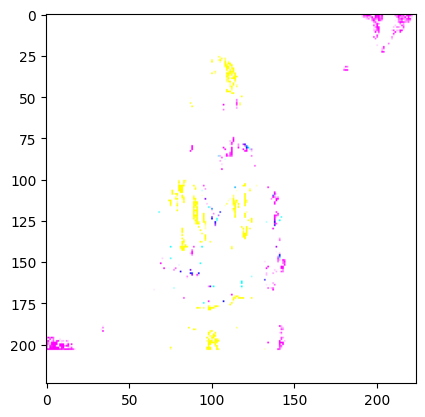

In [35]:
plt.imshow(X_train[58],cmap='gray')
plt.show()

In [28]:
images_list = []
# Iterate over the dataset and convert to numpy arrays
for images, labels in test_ds:
    images_list.append(images.numpy())
# Convert lists to numpy arrays
X_test = np.concatenate(images_list, axis=0)
# Print shapes
print("Images shape:", X_test.shape)

Images shape: (71, 224, 224, 3)


In [29]:
images_list = []
# Iterate over the dataset and convert to numpy arrays
for images, labels in val_ds:
    images_list.append(images.numpy())
# Convert lists to numpy arrays
X_val = np.concatenate(images_list, axis=0)
# Print shapes
print("Images shape:", X_val.shape)

Images shape: (37, 224, 224, 3)


In [36]:
#Normlizing Input
X_train = X_train/224
X_test = X_test/224
X_val = X_val/224

In [37]:
X_train.shape

(248, 224, 224, 3)

In [121]:
def model():
    model=tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(3,3),input_shape=(224, 224, 3),data_format="channels_last"),
     ## Conv2D with 32 7x7 filters and stride of 1
    tf.keras.layers.Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0'),
    ## BatchNormalization for axis 3
    tf.keras.layers.BatchNormalization(axis = 3, name = 'bn0'),
    ## ReLU
    tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
    ## Max Pooling 2D with default parameters
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
    ## Flatten layer
    tf.keras.layers.Flatten(),
    ## Dense layer with 1 unit for output & 'sigmoid' activation
    tf.keras.layers.Dense(2, activation='sigmoid', name='fc'),
    tf.keras.layers.Dense(8, activation='sigmoid', name='fc1'),
    tf.keras.layers.Dense(2, activation='softmax', name='fc2'),
    ])
    return model
    

In [122]:
model=model()

In [123]:
model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_16 (ZeroPadding2D)    │ (None, 230, 230, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv0 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn0 (BatchNormalization)             │ (None, 224, 224, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_16 (ReLU)                      │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool0 (MaxPooling2D)             │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc (Dense)                           │ (None, 2)                   │         802,818 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 807,724 (3.08 MB)

 Trainable params: 807,660 (3.08 MB)

 Non-trainable params: 64 (256.00 B)

In [125]:
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4216 - loss: 0.8159
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4024 - loss: 0.7803
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4338 - loss: 0.7407
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4458 - loss: 0.7195
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4697 - loss: 0.7039
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4723 - loss: 0.6976
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4067 - loss: 0.6976
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5697 - loss: 0.6917
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5791 - loss: 0.6887
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5286 - loss: 0.6917


In [129]:
X_train.shape

(248, 224, 224, 3)

In [127]:
p=model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.6184 - loss: 0.6875


In [128]:
p

[0.7008063197135925, 0.5492957830429077]

In [136]:
p=model.evaluate(X_val, y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.5479 - loss: 0.6937


In [137]:
p

[0.6966813802719116, 0.5405405163764954]

In [ ]:
#Start using functional API

In [134]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=2, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [135]:
conv_model = convolutional_model((224, 224, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 8)         │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_19 (ReLU)                      │ (None, 224, 224, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_20 (ReLU)                      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,490 (9.73 KB)

 Trainable params: 2,490 (9.73 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)
history = conv_model.fit(train_dataset, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8946 - loss: 0.2185
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.8946 - loss: 0.2159
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8946 - loss: 0.2140
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8946 - loss: 0.2119
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.8919 - loss: 0.2097
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.8919 - loss: 0.2077
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.8919 - loss: 0.2061
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8919 - loss: 0.2039
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.8919 - loss: 0.2022
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.8877 - loss: 0.2002
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8877 - loss: 0.1990
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy:

In [144]:
history.history

{'accuracy': [0.899193525314331,
  0.899193525314331,
  0.899193525314331,
  0.899193525314331,
  0.8951612710952759,
  0.8951612710952759,
  0.8951612710952759,
  0.8951612710952759,
  0.8951612710952759,
  0.8911290168762207,
  0.8911290168762207,
  0.8911290168762207,
  0.8911290168762207,
  0.8870967626571655,
  0.8951612710952759,
  0.8951612710952759,
  0.8951612710952759,
  0.8911290168762207,
  0.9032257795333862,
  0.8951612710952759,
  0.899193525314331,
  0.899193525314331,
  0.9032257795333862,
  0.9032257795333862,
  0.9072580933570862,
  0.9112903475761414,
  0.9072580933570862,
  0.9072580933570862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9072580933570862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.9032257795333862,
  0.899193525314331,
  0.9032257795333862,
  0.8

In [145]:
import pandas as pd

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_11564\3598299578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train'},inplace=True)
C:\Users\Mega Store\AppData\Local\Temp\ipykernel_11564\3598299578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

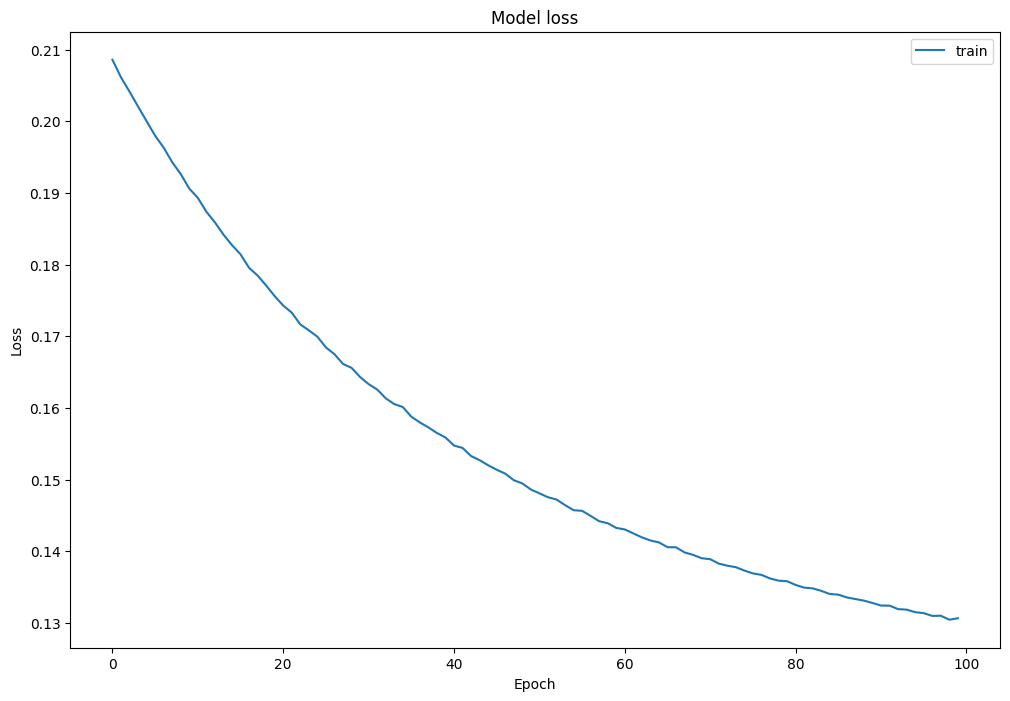

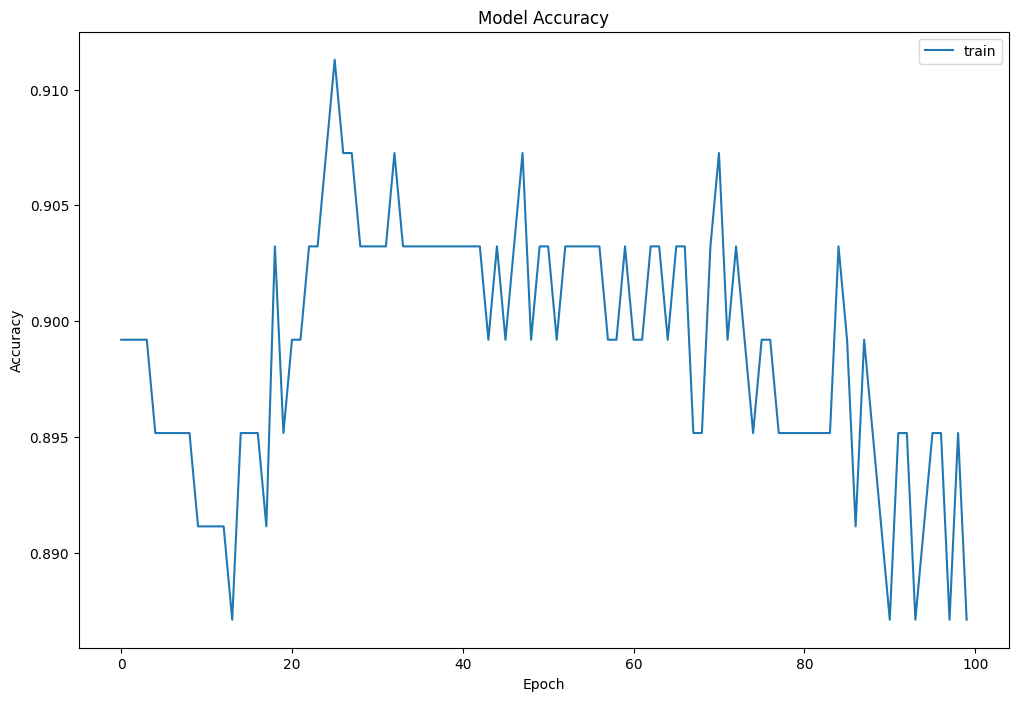

In [147]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss',]]
df_loss.rename(columns={'loss':'train'},inplace=True)
df_acc= df_loss_acc[['accuracy',]]
df_acc.rename(columns={'accuracy':'train'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')